In [136]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [6]:
a = np.random.random((10,3))
print([a[i, np.argmin(abs(a[i]-0.5))] for i in range(10)])

[0.36362100784144913, 0.07062369775968624, 0.4582622013992421, 0.518896211043714, 0.7166529522222442, 0.5296354323622783, 0.4276291125588515, 0.4770198484603919, 0.5300106592937004, 0.766880295022852]


Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [11]:
a = np.random.random((6,6))
print([np.sum(a[i,:])/np.min(a[:,i]) for i in range(6)])

[35.65872348147754, 15.104181568864282, 8.87697646101665, 55.34635636260037, 15.739790573756427, 20.23306687470959]


На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [14]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
print(np.max([x[i] for i in range(1,len(x)) if x[i-1] == 0]))

5


Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [36]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
np.add.at(x,i,1)
x

array([2., 2., 2., 2., 1., 4., 1., 1., 2., 1.])

Написать функцию, реализующую алгоритм k-means. Входные и выходные значения функции должны быть аналогичны https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.vq.kmeans.html. Функция должна содержать только один цикл while (for).

In [185]:
def kmeans(data, k, iter=20, thresh=1e-05, plot=False, xlabel="", ylabel=""):
    n_feat = data.shape[1]
    n_obs = data.shape[0]
    to_cluster = np.zeros((n_obs), dtype=np.int)
    centroids = data[np.random.choice(range(n_obs), k, replace=False), :] # replace=False чтобы не было повторяющихся чисел
    
    i = 0
    distortion = np.zeros((k), dtype=np.float)
    old_distortion = distortion + 8*thresh
    colors = cm.rainbow(np.linspace(0, 1, k))
    
    while i < iter and np.max(abs(distortion - old_distortion)) > thresh:
        old_distortion = distortion.copy();
        i += 1
        
        dist_to_centroids = np.array([np.linalg.norm(data - centroids[i],axis=1) for i in range(k)])
        np.argmin(dist_to_centroids, axis=0, out=to_cluster)
        centroids = np.array([np.mean(data[to_cluster == n],axis=0) for n in range(k)])
        distortion = np.array([np.sum((data[to_cluster == n] - centroids[n])**2) for n in range(k)])
        
    # Graph
    if plot:
        for n, clr in zip(range(k), colors):
            plt.scatter(data[to_cluster == n, 0],data[to_cluster == n, 1], c=[clr], label="Cluster "+str(n))
        plt.legend()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        print("Iteration",i)
        plt.show()
        
    return (centroids, np.max(distortion))

С помощью реализованной функции kmeans выделить кластеры клиентов в разрезах возраст-доход, возрвст-покупательский индекс, доход-покупательский индекс. В каждом случае использовать elbow method для определения оптимального числа кластеров. Визуализировать полученные кластеры (каждый кластер изобразить собственным цветом). Дать интерпретацию полученным кластерам.

In [38]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)

Возраст - доход


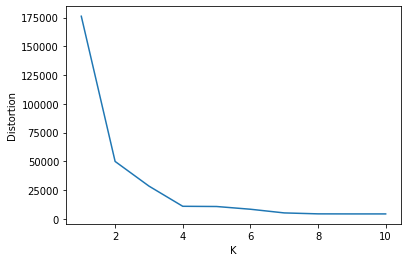

Iteration 8


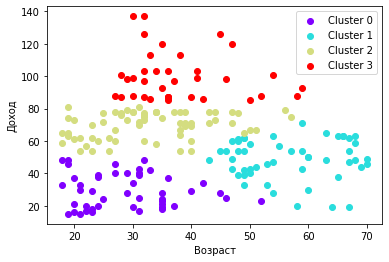

(array([[28.82608696, 29.41304348],
        [56.66666667, 48.92156863],
        [32.71641791, 69.67164179],
        [37.83333333, 99.88888889]]),
 11033.019607843142)

In [186]:
print("Возраст - доход")

distortion_by_k = np.array([kmeans(data[:,2:4], k)[1] for k in range(1,11)])
plt.plot(range(1,11), distortion_by_k)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

kmeans(data[:,2:4], 4, plot=True, xlabel="Возраст", ylabel="Доход")

Самые высокие зарплаты (> 80к) у людей от 30 до 60 лет. Для людей до 50 лет прослеживаются две прослойки: с зарплатой до 50к и зарплатой до 80к. Люди старше 50 лет получают до 80к. Скорее правильнее делить не на 4 кластера, а на 2: люди с высокими зарплатами от 30 до 60 лет и другие.
Можно сделать вывод, что больше всего зарабатывают люди среднего возраста, т.к. они имеют больше опыта и они ещё не стары.

Возраст - покупательский индекс


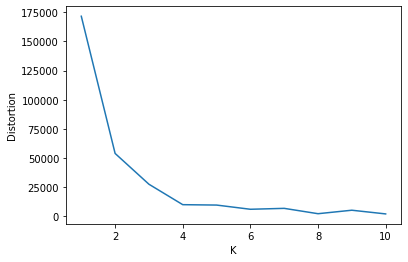

Iteration 9


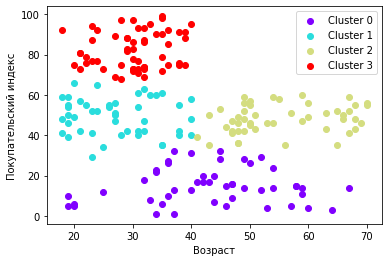

(array([[43.29166667, 15.02083333],
        [27.32608696, 49.36956522],
        [55.40816327, 48.04081633],
        [30.1754386 , 82.35087719]]),
 10102.895833333334)

In [187]:
print("Возраст - покупательский индекс")

distortion_by_k = np.array([kmeans(data[:,[2,4]], k)[1] for k in range(1,11)])
plt.plot(range(1,11), distortion_by_k)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

kmeans(data[:,[2,4]], 4, plot=True, xlabel="Возраст", ylabel="Покупательский индекс")

У большого числа молодых людей (до 40 лет) наблюдается высокий потребительский индекс, в то время как более пожилые люди (40+) предпочитают меньше тратить.

Доход - покупательский индекс


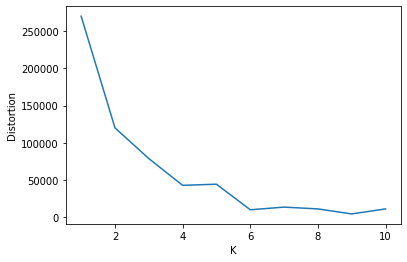

Iteration 8


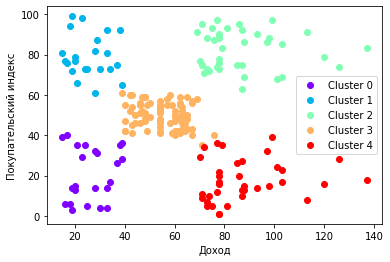

(array([[26.30434783, 20.91304348],
        [25.72727273, 79.36363636],
        [86.53846154, 82.12820513],
        [55.0875    , 49.7125    ],
        [87.75      , 17.58333333]]),
 13444.051282051283)

In [189]:
print("Доход - покупательский индекс")

distortion_by_k = np.array([kmeans(data[:,[3,4]], k)[1] for k in range(1,11)])
plt.plot(range(1,11), distortion_by_k)
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

kmeans(data[:,[3,4]], 5, plot=True, xlabel="Доход", ylabel="Покупательский индекс")

Среди людей с низким и высоким уровнем дохода примерно в той же пропорции разделяются группы с низким покупательским индексом (до 40) и высоким (выше 60), что странно: казалось бы, бедные должны меньше потреблять, а богатые -- больше. А тут получается, что уровень дохода не является помехой в этом.
В то же время люди среднего дохода и потребляют "средне" (от 40 до 60).